In [1]:
#drive.mount('/content/drive')

In [2]:
import seaborn as sns
import numpy as np
from sklearn.metrics import log_loss
import pandas as pd
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("../input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Train.csv")

In [4]:
df.head(5)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [5]:
df['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour
df['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month
df['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day
df['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year
df['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute

In [6]:
# '''if df.week.all() < 5:

#   df['week'] = 0
# else:
#   df['week'] = 1'''

In [7]:
df.head(2)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity,hour,month,day,year,minute
0,0.407,0.0038,2,-35.865,1,0.992,0.944,0.0988,0.1100,113.911,189125,4,4,1,3,1970,32
1,0.234,0.1050,0,-19.884,1,0.944,0.900,0.1290,0.0382,76.332,186513,4,3,1,3,1970,48


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
 12  hour            18208 non-null  int64  
 13  month           18208 non-null  int64  
 14  day             18208 non-null  int64  
 15  year            18208 non-null  int64  
 16  minute          18208 non-null  int64  
dtypes: float64(8), int64(9)
memory 

In [9]:
df.skew()

Store_Ratio       -0.460388
Basket_Ratio      -0.124140
Category_1         0.040952
Store_Score       -1.134367
Category_2        -0.622149
Store_Presence     0.111894
Score_1            0.623296
Score_2            2.863491
Score_3            0.266906
Score_4            0.385495
time               8.680522
popularity        -3.051638
hour               0.036255
month             95.407022
day                3.704050
year               0.000000
minute             0.014676
dtype: float64

In [10]:
def distribution_check(df,Cols):
    plt.figure(figsize=(12,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


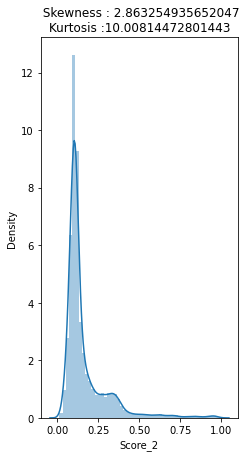

In [11]:
distribution_check(df,['Score_2'])

In [12]:
#df['Score_2'] = np.log(df['Score_2'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


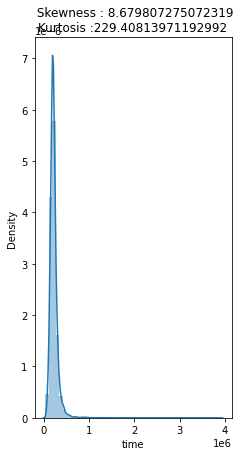

In [13]:
distribution_check(df,['time'])

In [14]:
df.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
hour              0
month             0
day               0
year              0
minute            0
dtype: int64

In [15]:
df.popularity.nunique()

5

In [16]:
y = df[['popularity']]
df = df.drop(["popularity","time","Basket_Ratio"],1)

In [17]:
X = df

<AxesSubplot:>

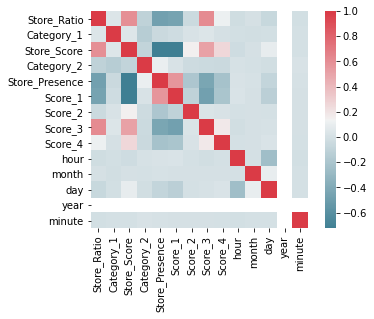

In [18]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
#y = np.array(y)

In [21]:
from sklearn import preprocessing
#y = preprocessing.label_binarize(y, classes=[0, 1, 3,4,5])

In [22]:
X = scaler.fit_transform(X,1)
X

array([[0.40781563, 0.18181818, 0.24656294, ..., 0.1       , 0.        ,
        0.54237288],
       [0.23446894, 0.        , 0.5830263 , ..., 0.1       , 0.        ,
        0.81355932],
       [0.66933868, 0.81818182, 0.84350591, ..., 0.05      , 0.        ,
        0.83050847],
       ...,
       [0.16833667, 0.45454545, 0.28654441, ..., 0.05      , 0.        ,
        0.93220339],
       [0.5991984 , 0.09090909, 0.85093795, ..., 0.05      , 0.        ,
        0.37288136],
       [0.58316633, 0.18181818, 0.78514432, ..., 0.1       , 0.        ,
        0.91525424]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

SMOTE

In [24]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [25]:
counter = Counter(y_train)

In [26]:
smt = ADASYN()
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

In [27]:
counter = Counter(y_train_sm)

In [28]:
print(counter)

Counter({'popularity': 1})


# RF

In [29]:
class_weight=dict({4:60,0:100,3:85,5:90,1:90})

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000,class_weight=class_weight,verbose = 1,n_jobs = -1,random_state = 42)

In [31]:
%%time

clf.fit(X_train, y_train)

pred_new = clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s


CPU times: user 59.1 s, sys: 842 ms, total: 59.9 s
Wall time: 16.6 s


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished


In [32]:
pred_new = clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished


In [33]:
print ("Accuracy of test set",accuracy_score(y_test, pred_new)*100,"%")

Accuracy of test set 88.9132821075741 %


In [34]:
pred_log = clf.predict_proba(X_test)
print ("log loss of test set",log_loss(y_test, pred_log))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s


log loss of test set 0.34194010456811974


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished


In [35]:
0.3362938412561886

0.3362938412561886

Hyper parameter tuning

In [36]:
param_grid = { 
    'n_estimators': [200, 500,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}
from sklearn.model_selection import GridSearchCV

In [37]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rave

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 100, 1: 90,
                                                            3: 85, 4: 60,
                                                            5: 90},
                                              n_estimators=1000, n_jobs=-1,
                                              random_state=42, verbose=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 300]})

In [38]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 300}

# Feature selection

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [40]:
pred = lr.predict(X_test)
pred1 = lr.predict(X_train)

In [41]:
print ("Accuracy of test set",accuracy_score(y_test, pred)*100,"%")
print ("Accuracy of training set",accuracy_score(y_train, pred1)*100,"%")

Accuracy of test set 83.75411635565312 %
Accuracy of training set 83.55206105104932 %


Light gbm

In [42]:
import lightgbm as lgb
train = lgb.Dataset(X_train, label=y_train)
test = lgb.Dataset(X_test, label=y_test)

In [43]:
param = {'objective': 'multiclass',
         'num_iterations': 1000,
         'learning_rate': 0.01,  
         'num_leaves': 23,
         'verbose':0,
         'max_depth': 15, 
         'min_data_in_leaf': 25, 
         'max_bin': 10, 
         'min_data_in_bin': 2,   
         'num_class': 6,
         'metric': 'multi_logloss'
         }

In [44]:
lgbm = lgb.train(params=param,
                 train_set=train,
                 num_boost_round=200,
                 valid_sets=[test])

y_pred_class = lgbm.predict(X_test)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 0.565576
[2]	valid_0's multi_logloss: 0.558364
[3]	valid_0's multi_logloss: 0.555087
[4]	valid_0's multi_logloss: 0.552002
[5]	valid_0's multi_logloss: 0.549171
[6]	valid_0's multi_logloss: 0.546365
[7]	valid_0's multi_logloss: 0.543759
[8]	valid_0's multi_logloss: 0.541144
[9]	valid_0's multi_logloss: 0.538661
[10]	valid_0's multi_logloss: 0.53629
[11]	valid_0's multi_logloss: 0.534022
[12]	valid_0's multi_logloss: 0.53192
[13]	valid_0's multi_logloss: 0.529879
[14]	valid_0's multi_logloss: 0.527896
[15]	valid_0's multi_logloss: 0.52598
[16]	valid_0's multi_logloss: 0.524179
[17]	valid_0's multi_logloss: 0.522516
[18]	valid_0's multi_logloss: 0.52058
[19]	valid_0's multi_logloss: 0.518971
[20]	valid_0's multi_logloss: 0.

In [45]:
predictions = []
for x in y_pred_class:
    predictions.append(np.argmax(x))

print('accuracy:', accuracy_score(y_test, predictions)*100)

accuracy: 85.51042810098792


# Fitting on Test set

In [46]:
df = pd.read_csv("../input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Test.csv")

In [47]:
#df['time'] = np.log(df['time'])

In [48]:
df['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour
df['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month
df['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day
df['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year
#df['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute
df = df.drop(["time"],1)

In [49]:
X = df

In [50]:
df

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,hour,month,day,year
0,0.164,0.994,1,-23.718,0,0.12400,0.991000,0.7890,0.00001,127.602,17,1,3,1970
1,0.586,0.636,4,-7.710,1,0.00208,0.322000,0.1070,0.35500,136.337,22,1,3,1970
2,0.457,0.743,0,-7.591,1,0.40400,0.009310,0.2010,0.68800,154.902,11,1,3,1970
3,0.423,0.748,5,-9.832,1,0.03000,0.221000,0.1690,0.42800,93.977,18,1,4,1970
4,0.802,0.756,2,-10.791,0,0.08430,0.007650,0.0521,0.96300,131.715,8,1,4,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12135,0.171,0.118,2,-25.360,1,0.86100,0.871000,0.0932,0.05390,78.303,5,1,3,1970
12136,0.744,0.859,11,-3.166,1,0.02560,0.000063,0.0881,0.78700,91.977,16,1,3,1970
12137,0.572,0.852,6,-4.712,0,0.00105,0.000000,0.0844,0.37800,129.969,12,1,3,1970
12138,0.761,0.525,11,-6.900,1,0.44000,0.000007,0.0921,0.53100,80.870,18,1,3,1970


In [51]:
X = scaler.transform(X)
X

array([[ 1.64328657e-01,  9.03636364e-02,  1.02271722e+00, ...,
         0.00000000e+00, -1.96700000e+03,  3.33898305e+01],
       [ 5.87174349e-01,  5.78181818e-02,  1.08587911e+00, ...,
         0.00000000e+00, -1.96700000e+03,  3.33898305e+01],
       [ 4.57915832e-01,  6.75454545e-02,  1.00166326e+00, ...,
         0.00000000e+00, -1.96700000e+03,  3.33898305e+01],
       ...,
       [ 5.73146293e-01,  7.74545455e-02,  1.12798703e+00, ...,
         0.00000000e+00, -1.96700000e+03,  3.33898305e+01],
       [ 7.62525050e-01,  4.77272727e-02,  1.23325684e+00, ...,
         0.00000000e+00, -1.96700000e+03,  3.33898305e+01],
       [ 3.41683367e-01,  1.79090909e-02,  1.19114891e+00, ...,
         0.00000000e+00, -1.96900000e+03,  3.33898305e+01]])

In [52]:
pred_log = clf.predict_proba(X)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.1s finished


In [53]:
pred_log

array([[0.11 , 0.029, 0.275, 0.472, 0.114],
       [0.048, 0.072, 0.215, 0.59 , 0.075],
       [0.059, 0.118, 0.237, 0.5  , 0.086],
       ...,
       [0.047, 0.016, 0.253, 0.639, 0.045],
       [0.062, 0.073, 0.213, 0.574, 0.078],
       [0.137, 0.102, 0.235, 0.385, 0.141]])

In [54]:
prediction  = pd.DataFrame(pred_log,columns =['0','1','3','4','5'])
prediction

,0,1,3,4,5
0,0.110,0.029,0.275,0.472,0.114
1,0.048,0.072,0.215,0.590,0.075
2,0.059,0.118,0.237,0.500,0.086
3,0.075,0.146,0.212,0.476,0.091
4,0.049,0.013,0.215,0.668,0.055
...,...,...,...,...,...
12135,0.184,0.094,0.270,0.338,0.114
12136,0.049,0.064,0.231,0.575,0.081
12137,0.047,0.016,0.253,0.639,0.045
12138,0.062,0.073,0.213,0.574,0.078


In [55]:
prediction.to_csv('result_MP.csv',index=False)